# Import

0 : Latch:_LA_269353054_DevicePositionXOnLFAtP1;_CEID15651.4
1 : Latch:_LA_269353055_DevicePositionYOnLFAtP1;_CEID15651.5
2 : Latch:_LA_269353094_DispenseProcessAvePress;_CEID15651.7
3 : Latch:_LA_269353095_DispenseProcessAveZHeight;_CEID15651.8
4 : Latch:_LA_251920580_DispenserPressure_ECRO;_CEID15651.9
5 : Latch:_LA_269353101_PickProcessAvePickForce;_CEID15653.7
6 : Latch:_LA_269353102_PickProcessAveNeedleTopHeight;_CEID15653.8
7 : Latch:_LA_269353097_BondProcessAveBondForce;_CEID15652.6
8 : Latch:_LA_269353098_BondProcessAveBondZHeight;_CEID15652.7
9 : Latch:_LA_269353069_DiePlacementOnStripX;_CEID15652.11
10 : Latch:_LA_269353070_DiePlacementOnStripY;_CEID15652.12
11 : Latch:_LA_269353071_DiePlacementOnStripTheta;_CEID15652.13
12 : Sig:_BondProcess_PBIDiePlacementOnStripTheta_(post_Step)
13 : Sig:_BondProcess_PBIDiePlacementOnStripX_uM_(post_Step)
14 : Sig:_BondProcess_PBIDiePlacementOnStripY_uM_(post_Step)
15 : DataID


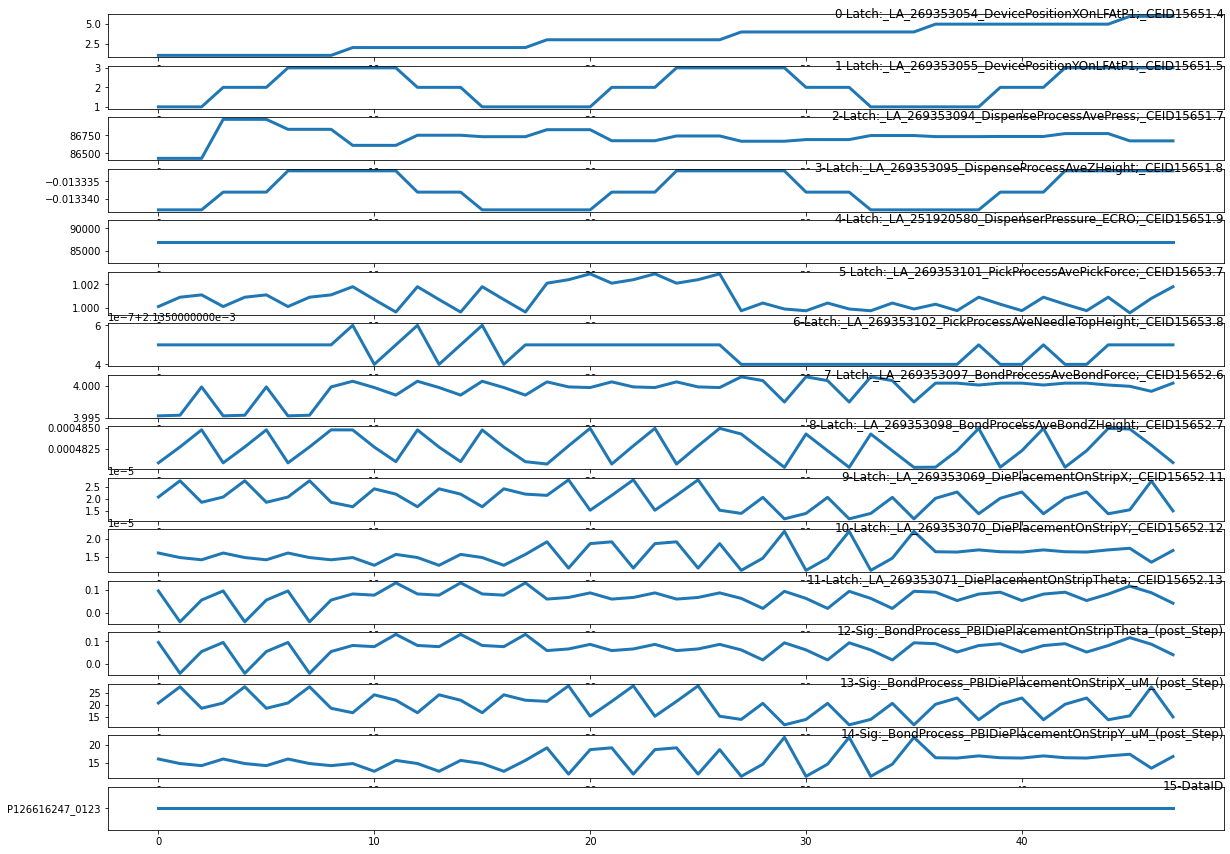

In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,GRU, Input, ConvLSTM2D, Bidirectional,BatchNormalization
from tensorflow.keras import Input
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,Nadam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import math
import json,os
from IPython.core.pylabtools import figsize
FDC_path = r"E:\FDC\dataset"
figsize(10,10) 
#FDC_Data = pd.read_csv(r'E:\FDC\dataset\data2021.csv', sep=',')

import data_vis as dv
import importlib
importlib.reload(dv)




FDC_2021Data = dv.read_data(os.path.join(FDC_path,'data_all_exclude_miss.csv'))
Y_LIST = [1,2,3,4,5,19,20,22,23,26,27,28,35,36,37,44]

X_LIST = dv.find_coi(FDC_2021Data,Y_LIST)
FDC_2021Data = FDC_2021Data.drop(FDC_2021Data.iloc[:,X_LIST],axis=1)
dv.df_col_map(FDC_2021Data)

import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),up=0,down=48)

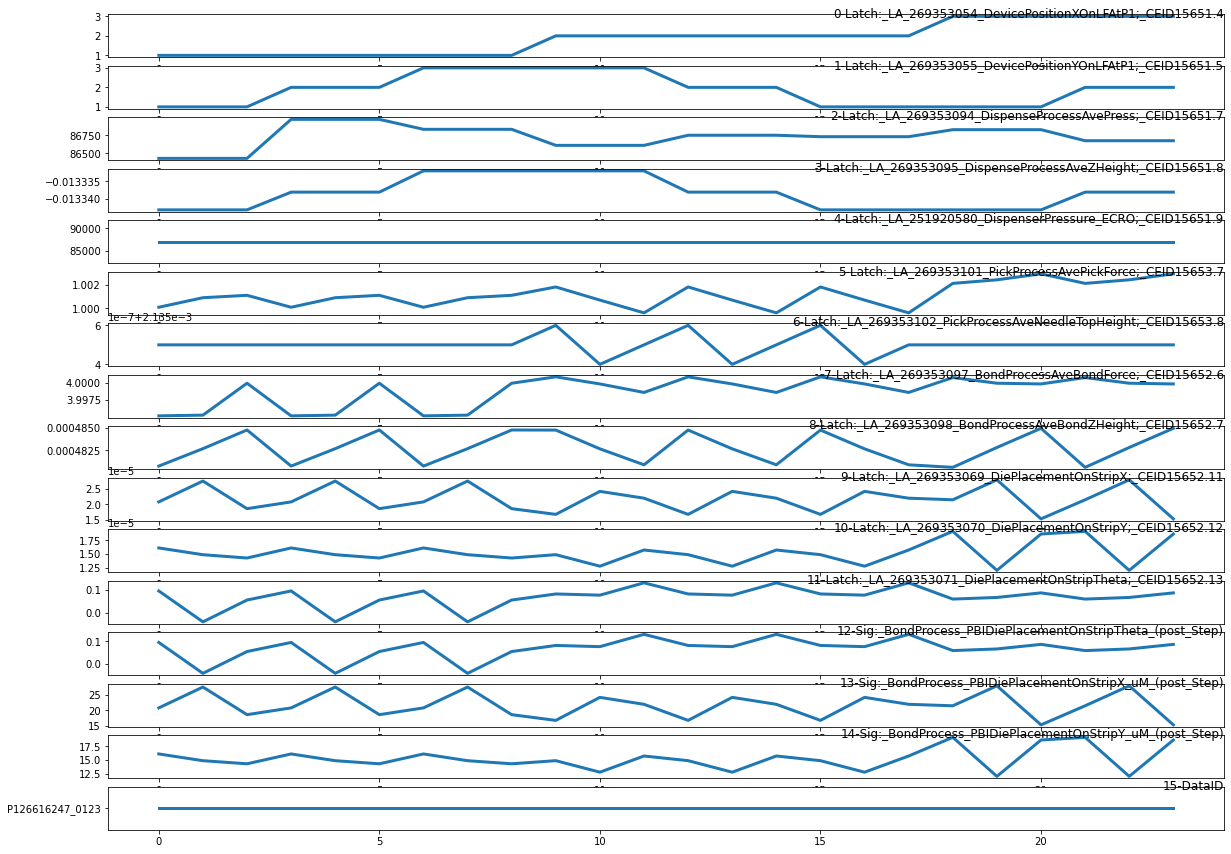

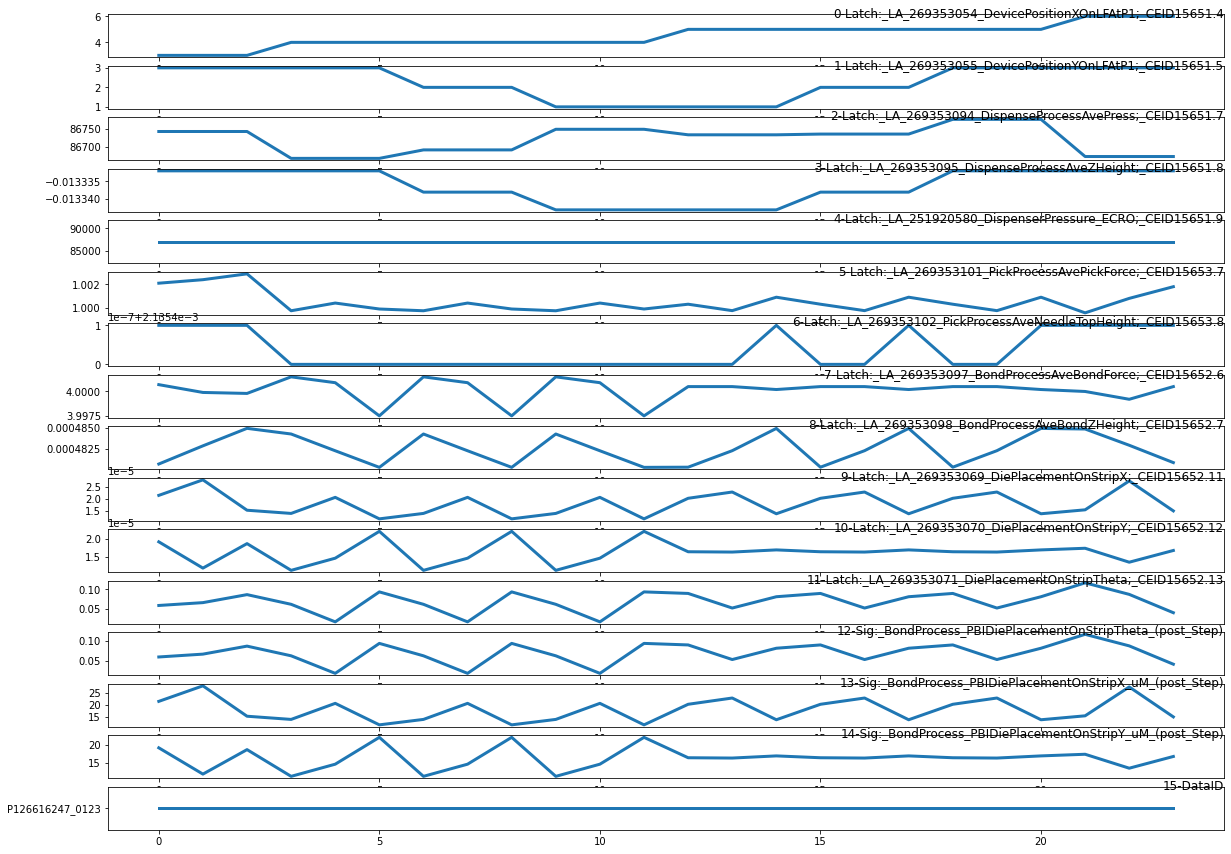

In [2]:
import data_vis as dv
import importlib
importlib.reload(dv)

dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),up=0,down=24)
dv.draw_trend(FDC_2021Data,groups=range(FDC_2021Data.shape[1]),up=24,down=48)

# Split Data

In [4]:
data = np.array(FDC_2021Data.iloc[:,5:12])
targets = np.array(FDC_2021Data.iloc[:,0])
from sklearn.preprocessing import MinMaxScaler,RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)

X_data = X_scaled
y_data = targets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(585403, 7)
(195135, 7)
(195135, 7)


# Dimension Reduciton

In [8]:
from pyod.models.auto_encoder import AutoEncoder



contamination = 0.1 
epochs = 30


clf = AutoEncoder(epochs=epochs, contamination=contamination,hidden_neurons=[7,64,32,32,64,7],batch_size=256)
clf.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 56        
_________________________________________________________________
dropout_8 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_9 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_10 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

AutoEncoder(batch_size=256, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[7, 64, 32, 32, 64, 7],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000019245FA2670>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [18]:
clf.decision_scores_[clf.decision_scores_>1000].index 

AttributeError: 'numpy.ndarray' object has no attribute 'index'

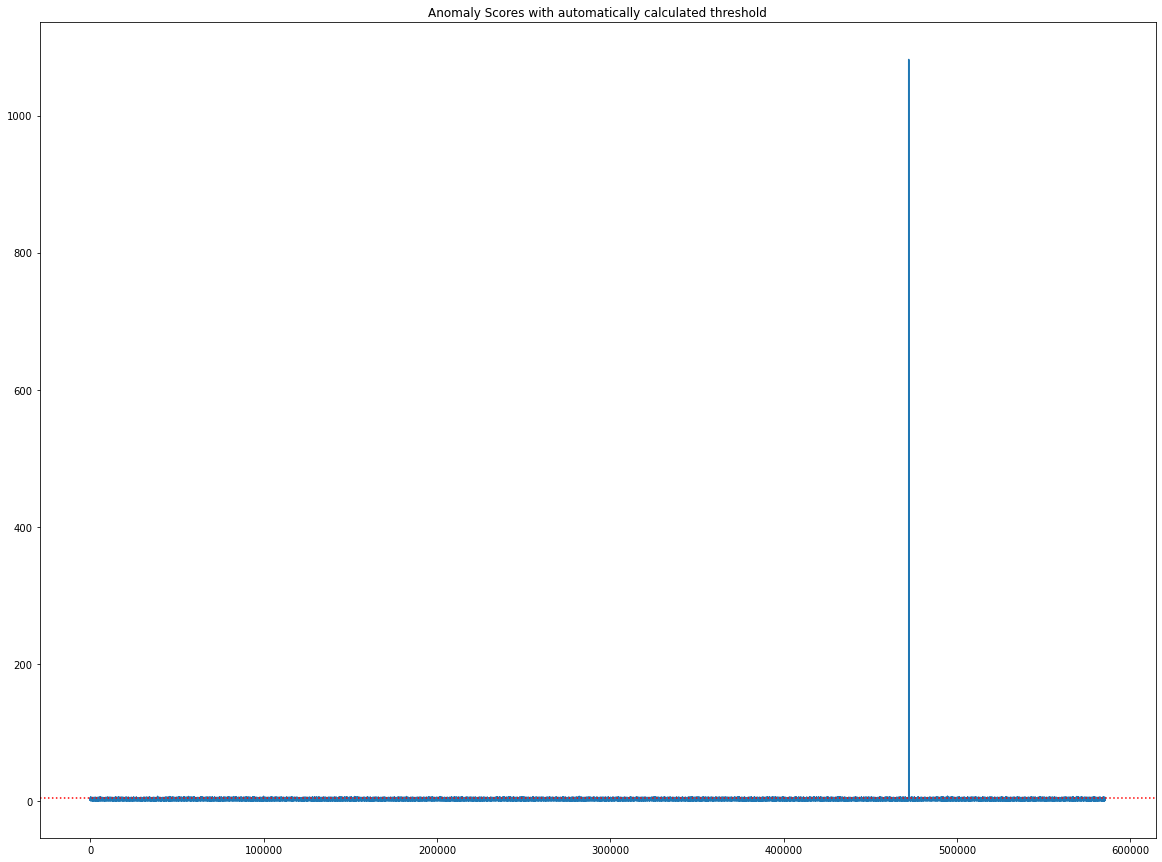

In [9]:
y_train_pred = clf.labels_  
y_train_scores = clf.decision_scores_ 


plt.plot(y_train_scores);
plt.axhline(y=clf.threshold_, c='r', ls='dotted', label='threshoold');
plt.title('Anomaly Scores with automatically calculated threshold');


In [12]:
import seaborn as sns
sns.scatterplot(x=0, y=1, hue=y_train_scores, data=FD, palette='RdBu_r');
plt.title('Anomaly Scores by PCA');

ValueError: arrays must all be same length